In [29]:
# Importar librerías
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [30]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [31]:
# Importación de pandas, archivo .csv
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [32]:
# Cantidad de filas y columnas
df.shape

(8523, 12)

In [33]:
# Tipos de datos en cada variable
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [34]:
# Buscar filas duplicadas
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [35]:
# Contar valores duplicados
# No existen valores duplicados
df.duplicated().sum()

0

In [36]:
# Identificar valores faltantes(nulos) por columna
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [37]:
# Total de valores faltantes
print(df.isna().sum().sum(), 'missing values')

3873 missing values


In [38]:
# Filtrar el conjunto de datos sólo para las filas a las que les falta al menos un valor y mostrar la forma
df[df.isna().any(axis=1)].shape

(3873, 12)

In [39]:
# "Item_Outlet_Sales" es el objetivo y el resto de las variables conforman la matriz de características
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [40]:
# instanciar los selectores a nuestros tipos de datos numéricos y categóricos
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')
# seleccionar las columnas numéricas de cada tipo
num_columns = num_selector(X_train)
cat_columns = cat_selector(X_train)
# compobar las listas
print('numeric columns are', num_columns)
print('categorical columns are', cat_columns)

numeric columns are ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
categorical columns are ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [41]:
# Aislar las columnas numéricas
df_num = df[num_columns]
# Aislar las columnas con datos faltantes
df_num.loc[:, df_num.isna().any()]

,Item_Weight
0,9.300
1,5.920
2,17.500
3,19.200
4,8.930
...,...
8518,6.865
8519,8.380
8520,10.600
8521,7.210


In [42]:
# Comprobar columnas en las que faltan datos
X_train.isna().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
dtype: bool

In [43]:
# Instanciar el objeto imputer de la clase SimpleImputer con la estrategia 'median'
mean_imputer = SimpleImputer(strategy='mean')
# Encajar el objeto imputer en los datos de entrenamiento numérico con .fit() 
# Calcular las medias (mean) de las columnas en el conjunto de entrenamiento
mean_imputer.fit(X_train[num_columns])
# Utilizar la media a partir de los datos de entrenamiento para rellenar los valores que falten
# en las columnas numéricas de los conjuntos de entrenamiento y de prueba con  .transform()
X_train.loc[:, num_columns] = mean_imputer.transform(X_train[num_columns])
X_test.loc[:, num_columns] = mean_imputer.transform(X_test[num_columns])

<ipython-input-43-5d1537c5666b>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train.loc[:, num_columns] = mean_imputer.transform(X_train[num_columns])
<ipython-input-43-5d1537c5666b>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_test.loc[:, num_columns] = mean_imputer.transform(X_test[num_columns])


In [44]:
# Comprobar si se rellenaron los valores
# Se rellenaron valores en columnas numéricas, faltan las categóricas
X_train.isna().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
dtype: bool

In [45]:
# Crear nuevo split con valores faltantes
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.isna().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
dtype: bool

In [46]:
# Instanciar los selectores a nuestros tipos de datos numéricos y categóricos
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [47]:
# Instanciar SimpleImputers con estrategias most_frequent y median
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

In [48]:
# Crear tuplas de (imputer, selector) para cada tipo de dato
num_tuple = (mean_imputer, num_selector)
cat_tuple = (freq_imputer, cat_selector)
# instanciación de ColumnTransformer
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('simpleimputer-1', SimpleImputer(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9cbfa97d30>),
                                ('simpleimputer-2',
                                 SimpleImputer(strategy='most_frequent'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9cbfa97eb0>)])

In [49]:
# Ajustar ColumnTransformer en los datos de entrenamiento
col_transformer.fit(X_train)
# Transformar los datos de entrenamiento y de prueba (esto generará un array de NumPy)
X_train_imputed = col_transformer.transform(X_train)
X_test_imputed = col_transformer.transform(X_test)
# Cambiar el resultado regreso a un DataFrame
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_train_imputed.isna().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
dtype: bool

In [50]:
# Se completa los valores faltantes de la columna 'Item Weight', que es de tipo "float", utilizando la media de la columna
# Utilizar la media, tendrá más coherencia que reemplazar por "0", especialmente si hay que realizar cálculos que puedan incluir medidas de tendencia central, entre otros.
mean_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean_weight, inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [51]:
# La columna 'Outlet_Size' tiene tres posibles categorías: medium, small, high
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [52]:
# Por el momento los datos de la columna 'Outlet_Size' se llenarán con una nueva categoría
# Utilizar la moda no es conveniente por la cantidad de datos faltantes, prácticamente se duplicaría los datos de una de las categorías
df['Outlet_Size'].fillna('Missing', inplace=True)

In [53]:
# Confirmar que ya no existen valores faltantes
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [54]:
# Buscar si hay alguna inconsistencia en las categorías de datos
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [55]:
# En la columna 'Item_Fat_Content' se repiten las mismas categorías, hay que unificarlas
# Regular y reg, son lo mismo, al igual que LF y low fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [56]:
# Obtener las estadísticas de las columnas numéricas
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [57]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Missing,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Missing,Tier 2,Supermarket Type1,4710.5350


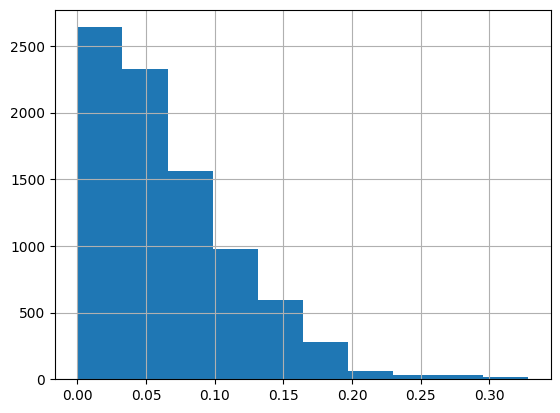

In [58]:
# Hacer un histograma y remover notación científica
df['Item_Visibility'].hist()
plt.ticklabel_format(useOffset=False, style='plain')

Podemos ver que la visibilidad de los items se encuentra en un rango de 0.00 a 0.33, por lo que en primera instancia se podría decir que hay una mayor frecuencia en productos con poca visibilidad.

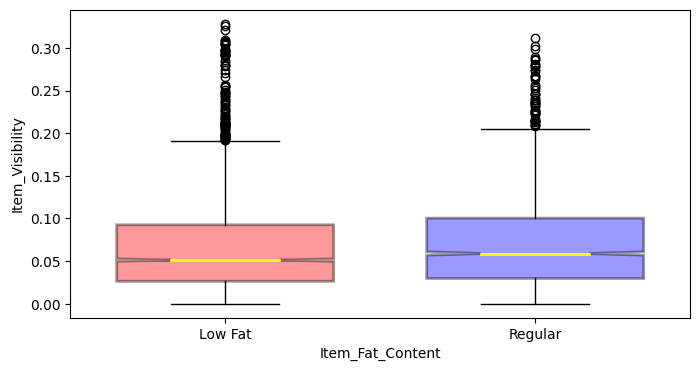

In [59]:
# Para analizar mejor la visibilidad, se genera un gráfico agregando una variable categórica
# Se genera estilo seaborn
# Se generan dos df, uno para cada filtro creado
# Se genera el boxplot
low_fat = df.loc[df['Item_Fat_Content']=='Low Fat','Item_Visibility']
regular = df.loc[df['Item_Fat_Content']=='Regular','Item_Visibility']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,4))
boxplots = axes.boxplot([low_fat,regular],
           notch = True,
           labels=['Low Fat', 'Regular'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
# Se personaliza el gráfico
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('Item_Fat_Content', fontsize = 10);
plt.ylabel('Item_Visibility', fontsize = 10);
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);

Se puede observar que no hay mucha diferencia en la distribución de los datos(visibilidad de los items) cuando el contenido de grasa es bajo o regular. Sin embargo existen algunos valores atípicos que se encuentran por encima del "máximo".

<ipython-input-60-25d31c46efb3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

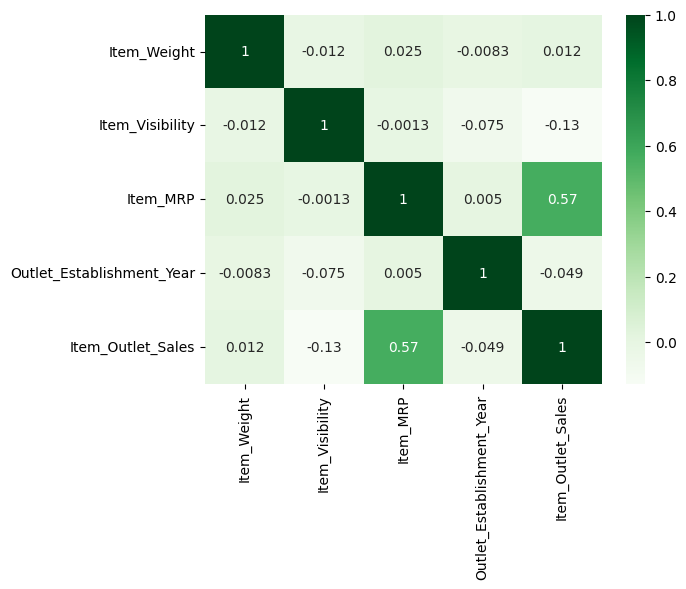

In [60]:
# Se agrega un mapa de calor, para hallar las correlaciones entre variables
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

Existe una correlación moderada entre las variables item_MRP e Item_Outlet_Sales. No se ha identificado ninguna relación entre las demás variables del conjunto de datos.